In [21]:
%matplotlib notebook

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import reverse_geocoder as rg
import pandas as pd
import numpy as np
import copy

In [23]:
#load the combined data for years 1980 to 2020
#This data does not have the country information
file_path="output_data/earthquake_data_1980-2020.csv"
quake_data_complete=pd.read_csv(file_path)
len(quake_data_complete)

67587

In [24]:
#This data contains all magnitudes from the range of year 1984 to 1990
quakes_8489 = quake_data_complete.loc[(quake_data_complete['Year']>=1984) &
                                   (quake_data_complete['Year']<=1989)
                                      ]



In [ ]:
#Add the country info from module reverse_geocoder 
#Warning *******( Takes several hours to run)*********
quakes_all_8489= copy.deepcopy(quakes_8489)
quakes_all_8489.loc[:,'Country'] = quakes_all_8489.apply(lambda x: rg.search((x['Lat'], x['Lng']))[0]['cc'], axis=1)  


In [ ]:
#quakes_all_8489.to_csv("output_data/quakes_all_8489.csv", index=False)

In [25]:
#Load the quakes category files
lfile_path="output_data/large_quakes_all.csv"
sfile_path="output_data/strong_quakes_all.csv"
mfile_path="output_data/medium_quakes_all.csv"
quakes_major=pd.read_csv(lfile_path)
quakes_strong=pd.read_csv(sfile_path)
quakes_medium=pd.read_csv(mfile_path)
quakes_major.set_index('Year')
quakes_strong.set_index('Year')
quakes_medium.set_index('Year')
len(quakes_medium)

61554

In [26]:
#Pick columns required to plot
columns = ['Year', 'Mag']
#From the  dataframes by magnitude isolate US and reduce columns
usa_quakes_major = quakes_major.loc[quakes_major["Country"] == "US", columns]
usa_quakes_strong = quakes_strong.loc[quakes_strong["Country"] == "US", columns]
usa_quakes_medium = quakes_medium.loc[quakes_medium["Country"] == "US", columns]
#groupby year and get average
usa_quakes_major=usa_quakes_major.groupby('Year').mean()
usa_quakes_medium=usa_quakes_medium.groupby('Year').mean()
usa_quakes_strong=usa_quakes_strong.groupby('Year').mean()
len(usa_quakes_medium)

41

<IPython.core.display.Javascript object>


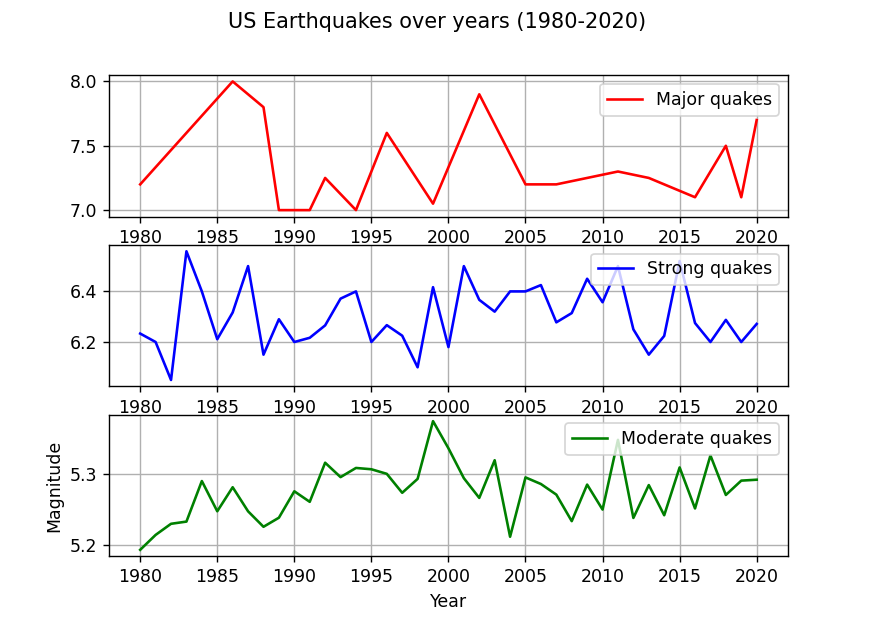

In [27]:
fig,(axs1, axs2, axs3) = plt.subplots(3)
#fig,(axs1, axs2) = plt.subplots(2)
fig.suptitle('US Earthquakes over years (1980-2020)')
fig.set_size_inches(7,5)
major, = axs1.plot(usa_quakes_major.index, usa_quakes_major.values, color="red", label="Major quakes")
strong, =axs2.plot(usa_quakes_strong.index, usa_quakes_strong.values, color="blue", label="Strong quakes")
moderate, =axs3.plot(usa_quakes_medium.index, usa_quakes_medium.values, color="green", label="Moderate quakes")

In [28]:
# Add labels to X and Y axes :: Add title
plt.xlabel("Year")
plt.ylabel("Magnitude")
axs1.legend(handles=[major], loc=1)
axs2.legend(handles=[strong], loc=1)
axs3.legend(handles=[moderate], loc=1)
axs1.grid()
axs2.grid()
axs3.grid()
plt.show()

In [29]:
quakes_all_8489=pd.read_csv("output_data/quakes_all_8489.csv")

In [30]:
quakes_all_8489['Date']=pd.to_datetime(quakes_all_8489['Time']).dt.date
len(quakes_all_8489)

9970

<IPython.core.display.Javascript object>


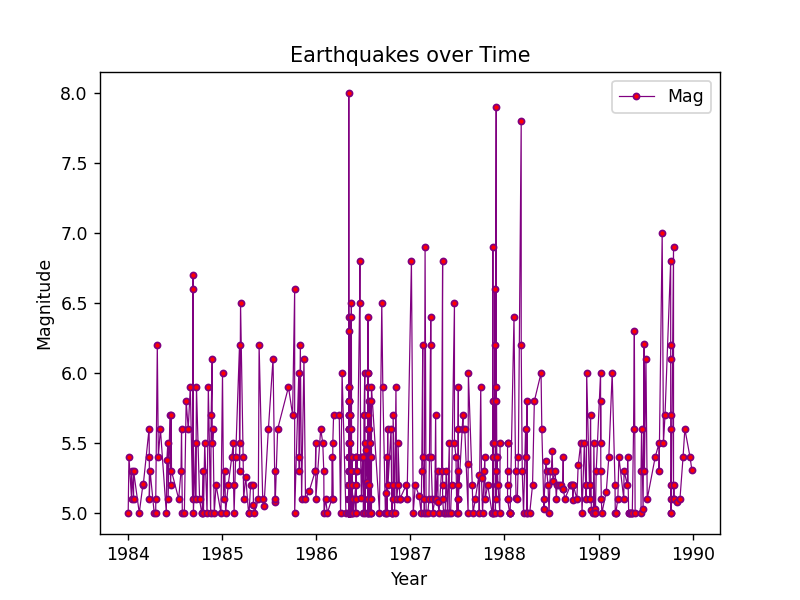

<AxesSubplot:xlabel='Date'>

In [31]:
columns = ['Date', 'Mag']
#From entire dataframe isolate US and reduce columns
quakes_all_8489.loc[quakes_all_8489["Country"] == "US",
                    columns].set_index('Date').plot(marker='.',
                                                    ms = 7, mfc = 'r',
                                                    linewidth=0.7, 
                                                    color='purple')


In [32]:
plt.title("Earthquakes over Time")
plt.xlabel("Year")
plt.ylabel("Magnitude")

Text(53.402777777777786, 0.5, 'Magnitude')

In [33]:
#Top quakes of  magnitude > 6
us_df=quakes_all_8489[['Lat','Lng', 'Depth', 'Mag', 'Sig', 'Time', 'Place', 'Country']]
quakes_8489=us_df.groupby(['Country']).filter(lambda x: (x['Country']=='US').any())
print(f'{len(quakes_8489)} quakes hit US over the duration of 1984 to 1989')
quakes_8489=quakes_8489.groupby(['Place']).filter(lambda x: (x['Mag']>6).any())
print(f'Out of those {len(quakes_8489)} quakes are of magnitude > 6')



499 quakes hit US over the duration of 1984 to 1989
Out of those 424 quakes are of magnitude > 6


In [34]:
quakes_8489.groupby('Place').count()

,Lat,Lng,Depth,Mag,Sig,Time,Country
Place,,,,,,,
"164 km SE of Chignik, Alaska",1,1,1,1,1,1,1
"17km WNW of Westmorland, CA",1,1,1,1,1,1,1
"22km W of Westmorland, CA",1,1,1,1,1,1,1
"75 km WNW of Ninilchik, Alaska",1,1,1,1,1,1,1
Alaska Peninsula,18,18,18,18,18,18,18
"Andreanof Islands, Aleutian Islands, Alaska",237,237,237,237,237,237,237
Central California,17,17,17,17,17,17,17
"Fox Islands, Aleutian Islands, Alaska",66,66,66,66,66,66,66
Gulf of Alaska,18,18,18,18,18,18,18
